In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from pprint import pprint

In [16]:
iris = sns.load_dataset('iris')

In [17]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Decision Tree

In [23]:
X = iris.iloc[:,:4]
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dtree.predict(X_test)

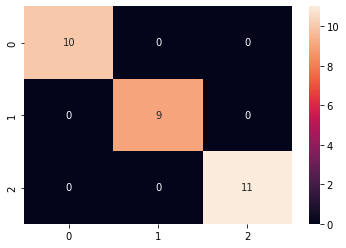

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [37]:
accuracy_score(y_test, y_pred)

1.0

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
from sklearn import tree

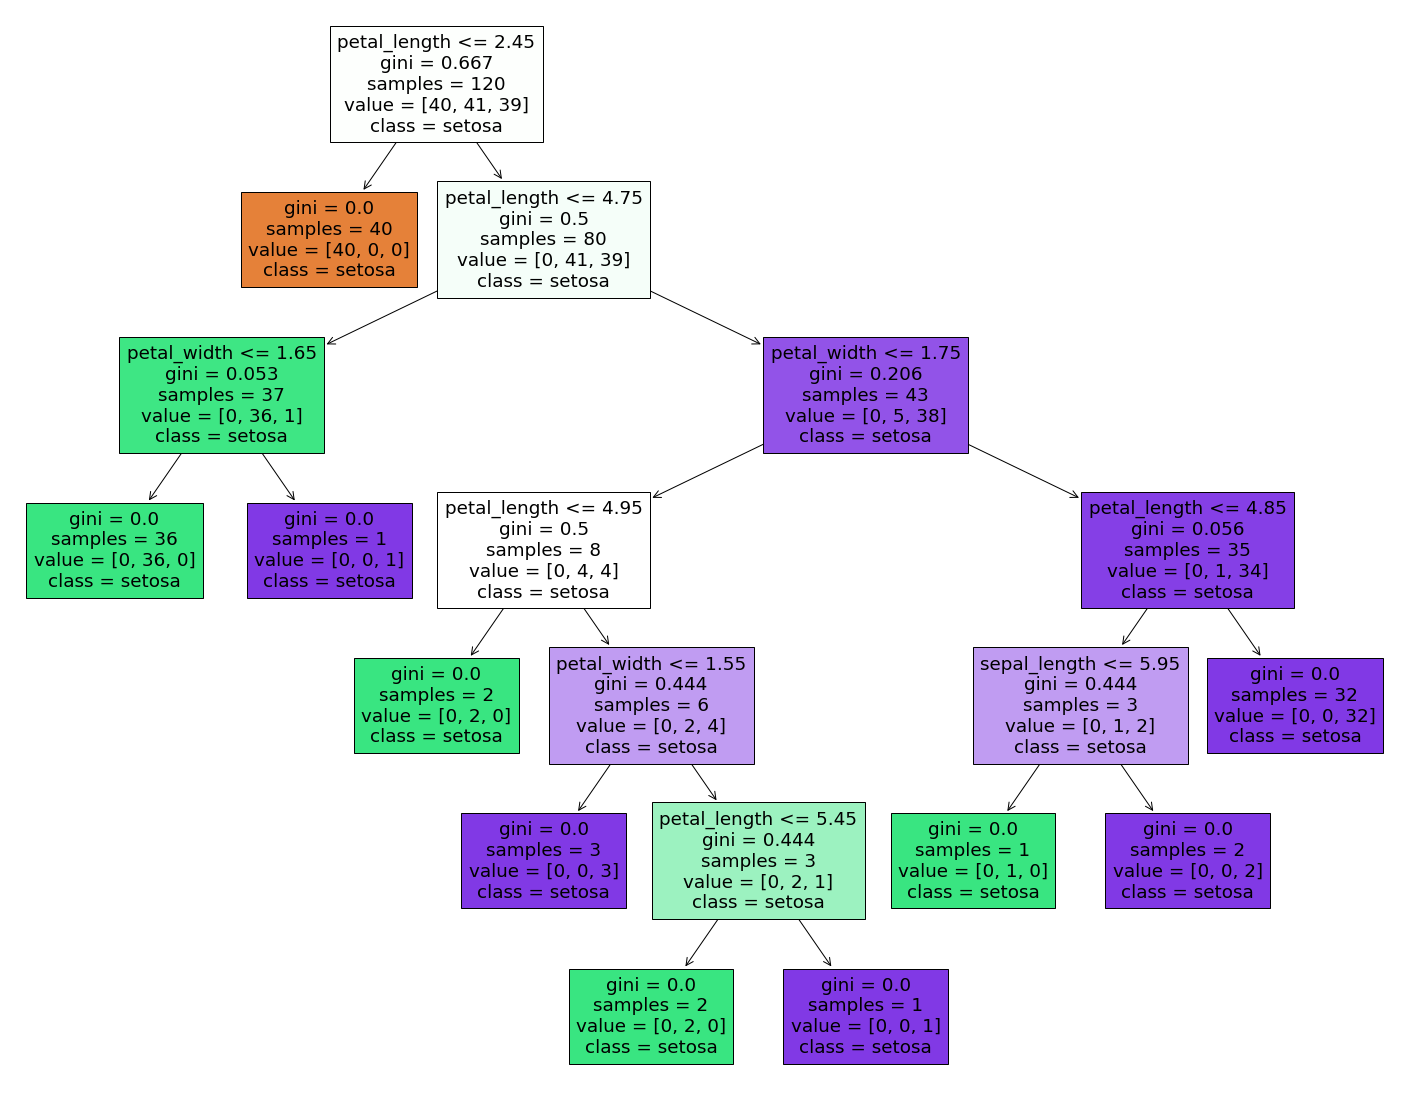

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=iris.columns,  
                   class_names=iris.species,
                   filled=True)

# Random Forest

In [50]:
X = iris.iloc[:,:4]
y = iris['species']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
clf = RandomForestClassifier()

In [53]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = clf.predict(X_test)

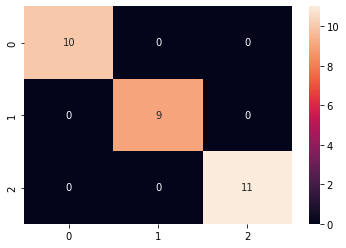

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Titanic Dataset

In [122]:
titanic = sns.load_dataset('titanic')

In [123]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

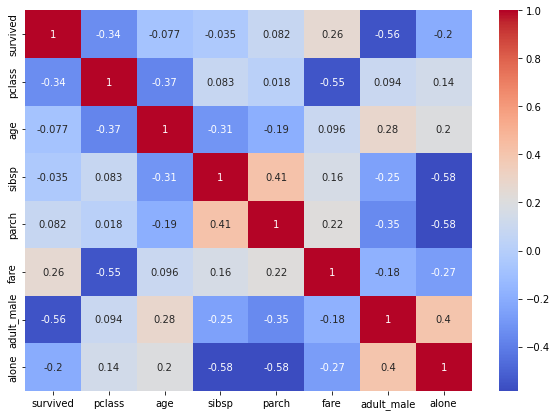

In [124]:
plt.figure(figsize=(10, 7))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.show()

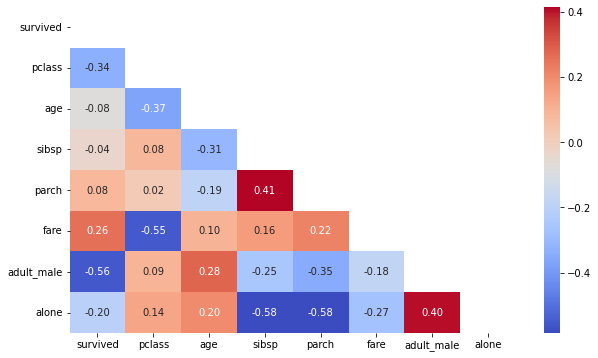

In [125]:
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(titanic.corr(), mask=mask, annot=True,cmap='coolwarm', fmt='.2f')

plt.show()

In [126]:
titanic = titanic.drop(columns=['alive','embark_town','deck'])

In [127]:
# titanic.groupby(['adult_male','alone'])['age'].transform('mean')

In [128]:
titanic['age'] = titanic['age'].fillna(titanic.groupby(['adult_male','alone'])['age'].transform('mean'))

In [132]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [133]:
titanic.dropna(inplace=True)

In [134]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [135]:
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),
           ('scaler', StandardScaler())]
)

categorical_features = ["embarked", "sex", "pclass"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                 ('cat', categorical_transformer, categorical_features)
                 ]
)

clf = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
           ("classifier",  LogisticRegression())
          ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [136]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])

In [140]:
y_pred = clf.predict(X_test)

In [141]:
print(clf.score(X_test, y_test))

0.7668161434977578


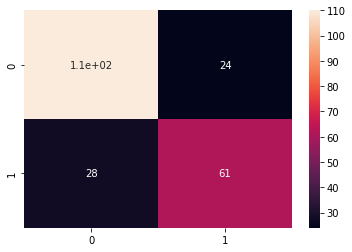

In [142]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       134
           1       0.72      0.69      0.70        89

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



In [146]:
print(clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])


In [147]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


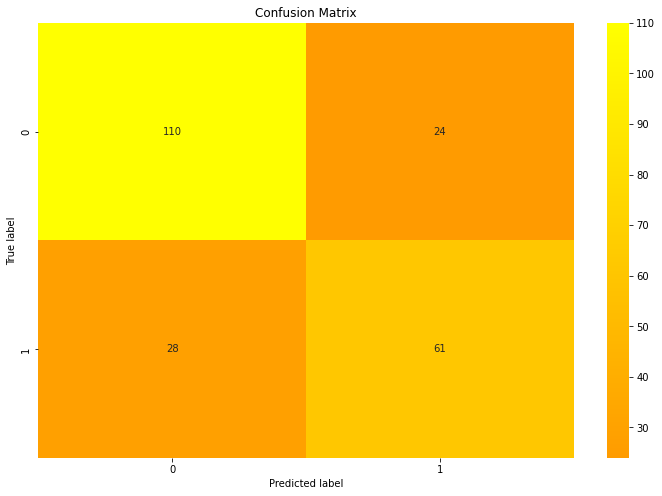

In [149]:
draw_confusion_matrix(confusion_matrix(y_test, y_pred))